In [59]:
## Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

### Data Loading
The mnist dataset requires loading from pytorch or tensorflow. The code can be found in the torch documentation: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [38]:
df_train = pd.read_csv('data/fashion-mnist_train.csv')
df_test = pd.read_csv('data/fashion-mnist_test.csv')

In [41]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

### Data Visualization

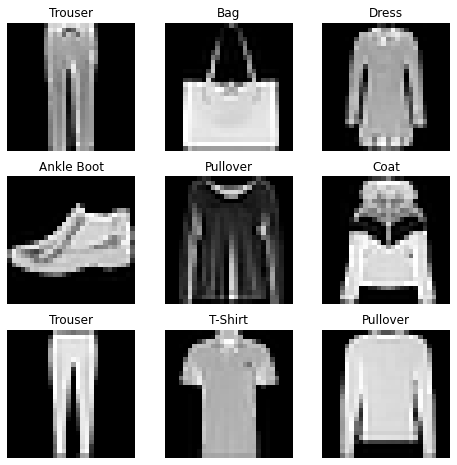

In [42]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Model

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Prepare the training and testing dataset 
X_train = df_train.iloc[:,1:]/255
y_train = df_train.iloc[:,0]

X_test = df_test.iloc[:,1:]/255
y_test = df_test.iloc[:,0]

In [56]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 5)

In [58]:
# * unpack the tuple
X_train = X_train.values.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.values.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.values.reshape(X_validate.shape[0], *(28, 28, 1))

In [61]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [63]:
cnn_model = Sequential()

cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [65]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [67]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/50
75/75 [==============================] - 5s 51ms/step - loss: 1.3966 - accuracy: 0.5432 - val_loss: 0.7864 - val_accuracy: 0.7178
Epoch 2/50
75/75 [==============================] - 2s 30ms/step - loss: 0.7235 - accuracy: 0.7370 - val_loss: 0.6207 - val_accuracy: 0.7722
Epoch 3/50
75/75 [==============================] - 2s 28ms/step - loss: 0.6255 - accuracy: 0.7724 - val_loss: 0.5705 - val_accuracy: 0.7907
Epoch 4/50
75/75 [==============================] - 2s 28ms/step - loss: 0.5768 - accuracy: 0.7904 - val_loss: 0.5184 - val_accuracy: 0.8163
Epoch 5/50
75/75 [==============================] - 2s 28ms/step - loss: 0.5441 - accuracy: 0.8030 - val_loss: 0.4937 - val_accuracy: 0.8239
Epoch 6/50
75/75 [==============================] - 2s 27ms/step - loss: 0.5219 - accuracy: 0.8114 - val_loss: 0.4738 - val_accuracy: 0.8318
Epoch 7/50
75/75 [==============================] - 2s 29ms/step - loss: 0.5037 - accuracy: 0.8159 - val_loss: 0.4624 - val_accuracy: 0.8349
Epoch 8/50
75

### Evaluating the model

In [69]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 2s 4ms/step - loss: 0.3454 - accuracy: 0.8740
Test Accuracy : 0.874


In [77]:
predicted_classes = np.argmax(cnn_model.predict(X_test),axis=1)

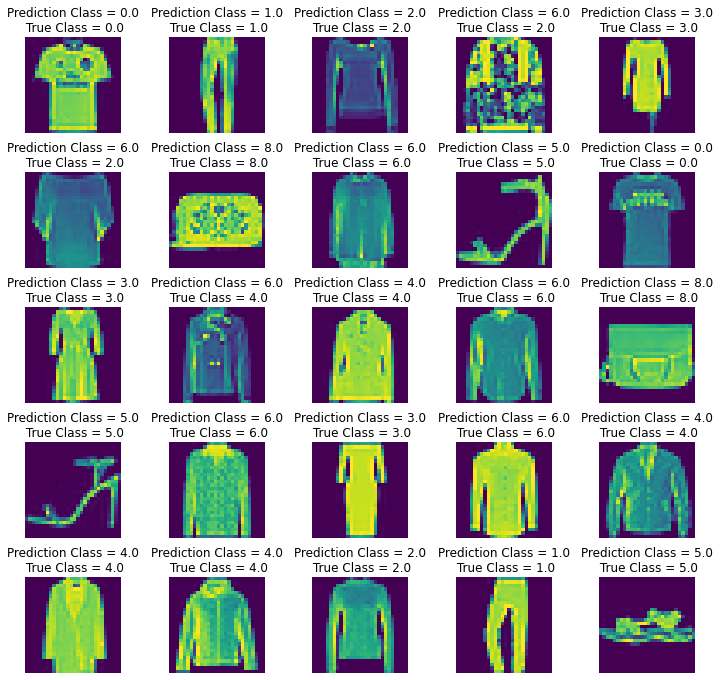

In [79]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [87]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

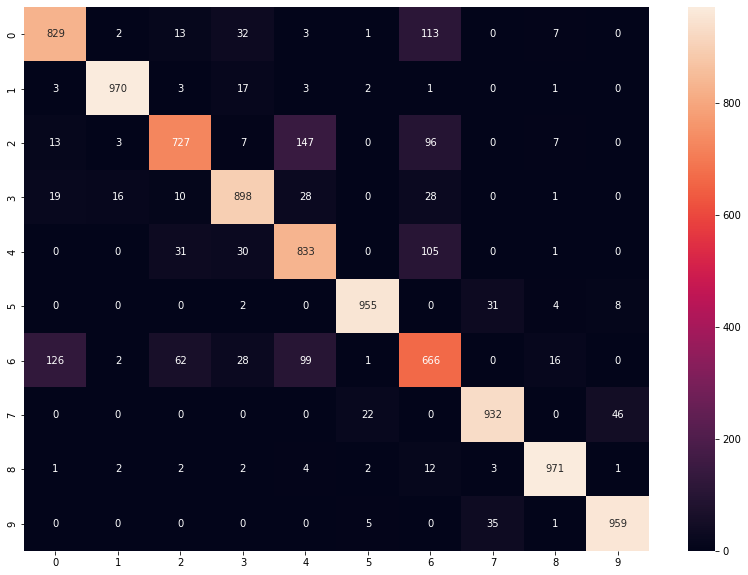

In [91]:
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True, fmt='g')

In [92]:
from sklearn.metrics import classification_report

In [93]:
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.83      0.83      1000
     Class 1       0.97      0.97      0.97      1000
     Class 2       0.86      0.73      0.79      1000
     Class 3       0.88      0.90      0.89      1000
     Class 4       0.75      0.83      0.79      1000
     Class 5       0.97      0.95      0.96      1000
     Class 6       0.65      0.67      0.66      1000
     Class 7       0.93      0.93      0.93      1000
     Class 8       0.96      0.97      0.97      1000
     Class 9       0.95      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

